In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('datasetcombine.csv')

In [ ]:
df

,ProcessId,ProcessName,ProcessAgeSeconds,ProcessImageEntropy,SessionId,IsElevated,FirstSeenTime,LastSeenTime,OperationDurationSec,ProcessCreateTime,...,TimingVariance,RemoteOperationCount,FileExtensionModificationCount,SecuritySettingModificationCount,WritesToReadsRatio,RegistryKeyDepthMax,RegistryValueEntropyAvg,ComRegistryModifications,CriticalSystemKeyModifications,IS_MALWARE
0,868,\Device\HarddiskVolume3\Windows\System32\servi...,29,258,0,1,1746196454,1746196484,30,1746196454,...,0,0,0,0,0,9,0,0,0,0
1,1664,\Device\HarddiskVolume3\Windows\System32\Taskm...,31,290,0,1,1746196454,1746196485,31,1746196454,...,0,0,0,0,0,12,0,0,0,0
2,4828,\Device\HarddiskVolume3\Windows\explorer.exe,30,250,0,1,1746196454,1746196485,30,1746196454,...,0,0,0,0,2,13,173,0,0,0
3,888,\Device\HarddiskVolume3\Windows\System32\lsass...,0,255,0,1,1746196454,1746196484,30,1746196454,...,0,0,0,0,0,9,0,0,0,0
4,1524,\Device\HarddiskVolume3\Windows\System32\VBoxS...,0,266,0,1,1746196454,1746196484,30,1746196454,...,0,0,0,0,0,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,143548,\Device\HarddiskVolume5\new\ransomware_high_co...,4,322,0,1,1746212553,1746212568,14,1746212553,...,0,0,0,0,0,9,250,0,0,1
1668,150064,\Device\HarddiskVolume3\Windows\System32\cmd.exe,10,235,0,1,1746212563,1746212573,10,1746212563,...,0,0,0,0,1,9,250,0,0,0
1669,150920,\Device\HarddiskVolume3\Windows\System32\conho...,0,281,0,1,1746212568,1746212568,0,1746212568,...,0,0,0,0,0,9,0,0,0,0
1670,151860,\Device\HarddiskVolume3\Windows\System32\vssad...,0,283,0,1,1746212573,1746212573,0,1746212573,...,0,0,0,0,0,9,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ProcessId                         1672 non-null   int64 
 1   ProcessName                       1653 non-null   object
 2   ProcessAgeSeconds                 1672 non-null   int64 
 3   ProcessImageEntropy               1672 non-null   int64 
 4   SessionId                         1672 non-null   int64 
 5   IsElevated                        1672 non-null   int64 
 6   FirstSeenTime                     1672 non-null   int64 
 7   LastSeenTime                      1672 non-null   int64 
 8   OperationDurationSec              1672 non-null   int64 
 9   ProcessCreateTime                 1672 non-null   int64 
 10  TotalOperationCount               1672 non-null   int64 
 11  CreateOperationCount              1672 non-null   int64 
 12  ModifyOperationCount

In [ ]:
df = df.drop(columns=['ProcessName', 'ProcessId'])


In [ ]:
df = df.loc[:, df.nunique() > 1]


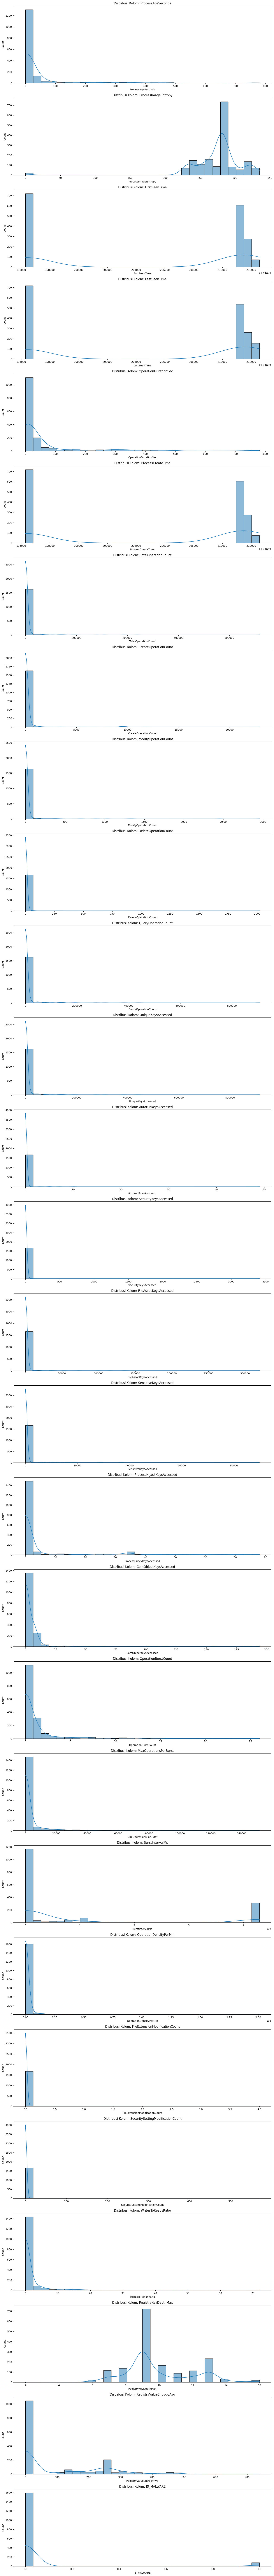

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5 * len(df.columns)))

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(len(df.columns), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom: {col}')

plt.tight_layout()
plt.show()

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

ProcessAgeSeconds                   227
ProcessImageEntropy                  59
FirstSeenTime                       476
LastSeenTime                        532
OperationDurationSec                263
ProcessCreateTime                   476
TotalOperationCount                 745
CreateOperationCount                150
ModifyOperationCount                 77
DeleteOperationCount                 26
QueryOperationCount                 738
UniqueKeysAccessed                  747
AutorunKeysAccessed                   7
SecurityKeysAccessed                 15
FileAssocKeysAccessed               366
SensitiveKeysAccessed                97
ProcessHijackKeysAccessed            25
ComObjectKeysAccessed                42
OperationBurstCount                  25
MaxOperationsPerBurst               527
BurstIntervalMs                     549
OperationDensityPerMin              487
FileExtensionModificationCount        4
SecuritySettingModificationCount      3
WritesToReadsRatio                   34


In [ ]:
print(df['OperationBurstCount'].value_counts())


OperationBurstCount
0     1116
1      314
2       76
3       37
4       24
5       19
7       17
6       13
11      12
9        8
8        7
12       7
14       5
15       3
25       2
22       2
26       2
19       1
13       1
10       1
17       1
24       1
21       1
18       1
16       1
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=['FileExtensionModificationCount', 'SecuritySettingModificationCount', 'AutorunKeysAccessed', 'FirstSeenTime', 'LastSeenTime', 'ProcessCreateTime'], errors='ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ProcessAgeSeconds          1672 non-null   int64
 1   ProcessImageEntropy        1672 non-null   int64
 2   OperationDurationSec       1672 non-null   int64
 3   TotalOperationCount        1672 non-null   int64
 4   CreateOperationCount       1672 non-null   int64
 5   ModifyOperationCount       1672 non-null   int64
 6   DeleteOperationCount       1672 non-null   int64
 7   QueryOperationCount        1672 non-null   int64
 8   UniqueKeysAccessed         1672 non-null   int64
 9   SecurityKeysAccessed       1672 non-null   int64
 10  FileAssocKeysAccessed      1672 non-null   int64
 11  SensitiveKeysAccessed      1672 non-null   int64
 12  ProcessHijackKeysAccessed  1672 non-null   int64
 13  ComObjectKeysAccessed      1672 non-null   int64
 14  OperationBurstCount     

In [ ]:
average_by_malware = df.groupby('IS_MALWARE').mean(numeric_only=True)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)
average_by_malware


#RegistryKeyDepthMax, ComObjectKeysAccessed, CreateOperationCount

,ProcessAgeSeconds,ProcessImageEntropy,OperationDurationSec,TotalOperationCount,CreateOperationCount,ModifyOperationCount,DeleteOperationCount,QueryOperationCount,UniqueKeysAccessed,SecurityKeysAccessed,FileAssocKeysAccessed,SensitiveKeysAccessed,ProcessHijackKeysAccessed,ComObjectKeysAccessed,OperationBurstCount,MaxOperationsPerBurst,BurstIntervalMs,OperationDensityPerMin,WritesToReadsRatio,RegistryKeyDepthMax,RegistryValueEntropyAvg
IS_MALWARE,,,,,,,,,,,,,,,,,,,,,
0,45.363636,272.276489,67.178683,4517.042006,126.318495,10.929154,1.469592,4378.324765,4505.688401,2.479624,906.534796,95.921630,2.254545,3.672100,1.054545,3255.050157,8.515657e+08,16025.366771,1.729781,9.899687,94.203762
1,6.805195,325.766234,15.155844,11641.740260,146.259740,39.480519,30.259740,11425.740260,11639.831169,1.051948,380.779221,1889.298701,4.727273,4.116883,0.337662,1104.220779,1.450243e+09,33634.857143,1.051948,9.974026,145.597403


In [ ]:
df = df.drop(columns=['RegistryKeyDepthMax', 'ComObjectKeysAccessed', 'CreateOperationCount'], errors='ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ProcessAgeSeconds          1672 non-null   int64
 1   ProcessImageEntropy        1672 non-null   int64
 2   OperationDurationSec       1672 non-null   int64
 3   TotalOperationCount        1672 non-null   int64
 4   ModifyOperationCount       1672 non-null   int64
 5   DeleteOperationCount       1672 non-null   int64
 6   QueryOperationCount        1672 non-null   int64
 7   UniqueKeysAccessed         1672 non-null   int64
 8   SecurityKeysAccessed       1672 non-null   int64
 9   FileAssocKeysAccessed      1672 non-null   int64
 10  SensitiveKeysAccessed      1672 non-null   int64
 11  ProcessHijackKeysAccessed  1672 non-null   int64
 12  OperationBurstCount        1672 non-null   int64
 13  MaxOperationsPerBurst      1672 non-null   int64
 14  BurstIntervalMs         

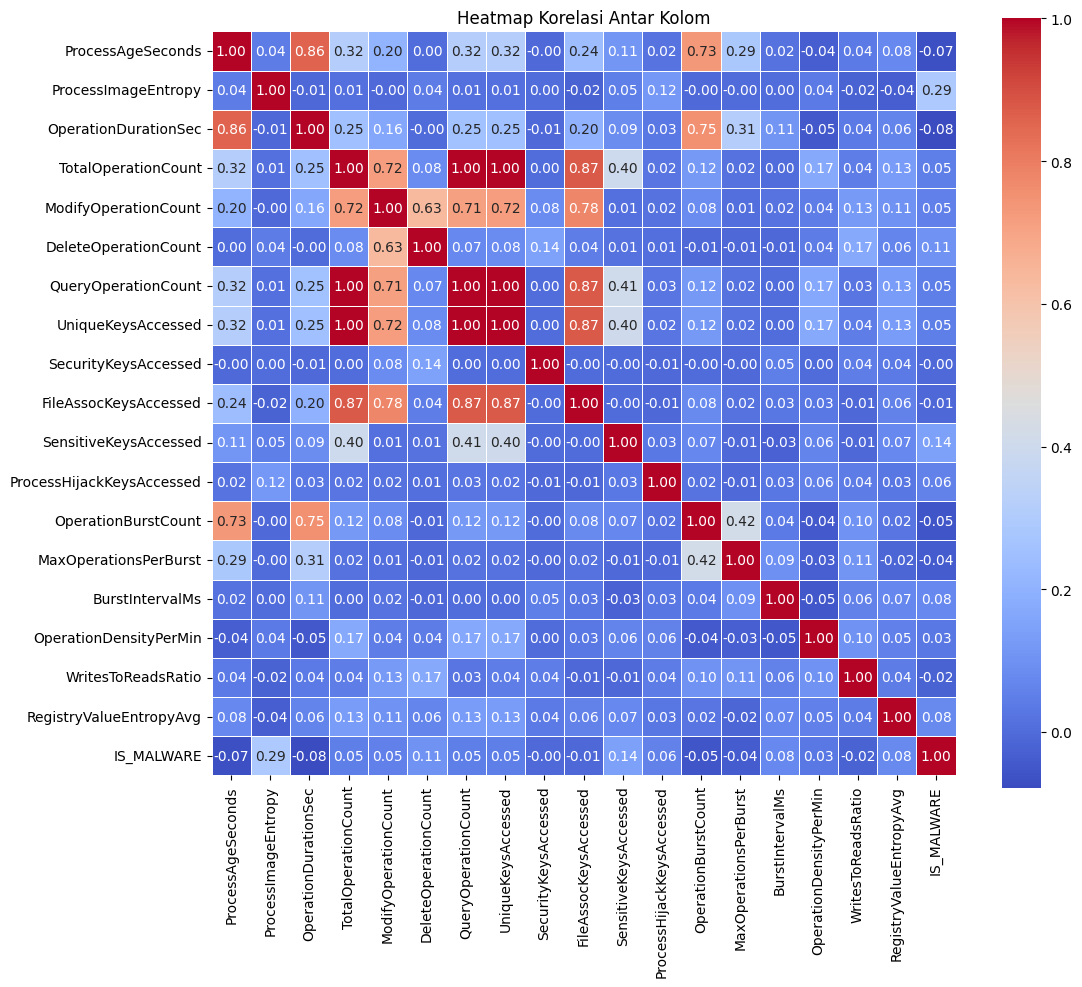

In [ ]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

#OperationBurstCount, QueryOperationCount, FileAssocKeysAccessed, TotalOperationCount

In [ ]:
df = df.drop(columns=['OperationBurstCount', 'QueryOperationCount', 'FileAssocKeysAccessed', 'TotalOperationCount'], errors='ignore')


In [ ]:
correlation_with_target = df.corr()['IS_MALWARE'].drop('IS_MALWARE')

correlation_with_target = correlation_with_target.reindex(correlation_with_target.abs().sort_values(ascending=False).index)

print(correlation_with_target)


ProcessImageEntropy          0.289527
SensitiveKeysAccessed        0.142855
DeleteOperationCount         0.105103
OperationDurationSec        -0.079080
RegistryValueEntropyAvg      0.078232
BurstIntervalMs              0.076235
ProcessAgeSeconds           -0.068262
ProcessHijackKeysAccessed    0.059969
ModifyOperationCount         0.052431
UniqueKeysAccessed           0.047598
MaxOperationsPerBurst       -0.039636
OperationDensityPerMin       0.033937
WritesToReadsRatio          -0.023942
SecurityKeysAccessed        -0.003587
Name: IS_MALWARE, dtype: float64


In [ ]:
!pip install imbalanced-learn xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# TUNING

In [ ]:
selected_features = ['ProcessImageEntropy', 'SensitiveKeysAccessed', 'DeleteOperationCount']
X = df[selected_features]
y = df['IS_MALWARE']


In [ ]:
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
print("Without SMOTE (with Scaling)")

for name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=skf)
    print(f"\nModel: {name}")
    print(f"Precision: {np.mean(scores['test_precision']):.3f}")
    print(f"Recall:    {np.mean(scores['test_recall']):.3f}")
    print(f"F1-score:  {np.mean(scores['test_f1']):.3f}")

Without SMOTE (with Scaling)

Model: RandomForest
Precision: 0.557
Recall:    0.860
F1-score:  0.671


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Model: XGBoost
Precision: 0.525
Recall:    0.962
F1-score:  0.677


In [ ]:
print("With SMOTE + Scaling")

for name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    smote_pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    scores = cross_validate(smote_pipeline, X, y, scoring=scoring, cv=skf)
    print(f"\nModel: {name} + SMOTE + Scaling")
    print(f"Precision: {np.mean(scores['test_precision']):.3f}")
    print(f"Recall:    {np.mean(scores['test_recall']):.3f}")
    print(f"F1-score:  {np.mean(scores['test_f1']):.3f}")

With SMOTE + Scaling

Model: RandomForest + SMOTE + Scaling
Precision: 0.535
Recall:    0.936
F1-score:  0.678


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost + SMOTE + Scaling
Precision: 0.382
Recall:    0.975
F1-score:  0.548


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
    ))
])

In [ ]:
param_grid = {
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__n_estimators': [50, 100, 150, 200],

}


In [ ]:
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipeline, param_grid, scoring='recall', cv=skf, n_jobs=-1)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
#print("Best F1 (default threshold 0.5):", grid.best_score_)
print("Best recall (default threshold 0.5):", grid.best_score_)

Best parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}
Best recall (default threshold 0.5): 0.9616666666666667


In [ ]:
import numpy as np
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)
best_params = grid.best_params_

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **best_params
    ))
])

thresholds = np.arange(0.1, 1.0, 0.005)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    precisions = []
    recalls = []
    f1s = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        probs = pipeline.predict_proba(X_test)[:, 1]
        preds = (probs >= threshold).astype(int)

        precision = precision_score(y_test, preds, zero_division=0)
        recall = recall_score(y_test, preds, zero_division=0)
        f1 = f1_score(y_test, preds, zero_division=0)

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1s)

    print(f"Threshold {threshold:.3f} → Precision: {avg_precision:.3f}, Recall: {avg_recall:.3f}, F1: {avg_f1:.3f}")

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.3f} with F1: {best_f1:.3f}")



Threshold 0.100 → Precision: 0.397, Recall: 0.962, F1: 0.560
Threshold 0.105 → Precision: 0.397, Recall: 0.962, F1: 0.560
Threshold 0.110 → Precision: 0.397, Recall: 0.962, F1: 0.560
Threshold 0.115 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.120 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.125 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.130 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.135 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.140 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.145 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.150 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.155 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.160 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.165 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.170 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.175 → Precision: 0.400, Recall: 0.962, F1: 0.564
Threshold 0.180 → Precis

# FINAL MODEL

In [ ]:
selected_features = ['ProcessImageEntropy', 'SensitiveKeysAccessed', 'DeleteOperationCount']
X = df[selected_features]
y = df['IS_MALWARE']


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **best_params
    ))
])

threshold = 0.825
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precisions, recalls, f1s = [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    probs = pipeline.predict_proba(X_test)[:, 1]
    preds = (probs >= threshold).astype(int)

    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    f1s.append(f1_score(y_test, preds))

print(f"Evaluasi dengan best params dan threshold {threshold} (tanpa SMOTE)")
print(f"Precision: {np.mean(precisions):.3f}")
print(f"Recall:    {np.mean(recalls):.3f}")
print(f"F1-score:  {np.mean(f1s):.3f}")

Evaluasi dengan best params dan threshold 0.825 (tanpa SMOTE)
Precision: 0.789
Recall:    0.859
F1-score:  0.819
